In [12]:
# import libraries 
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [28]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.linear = nn.Linear(2, 2)
        self.Sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1)
    def forward(self, input):
        x = self.linear(input)
#         x = self.Sigmoid(x)
        x = self.linear2(x)
        return x

In [29]:
xor_network = XOR()

In [30]:
# create data
Xs = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])

y = torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

In [31]:
xor_network = XOR()
epochs = 1000 
mseloss = nn.MSELoss() 
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03) 
all_losses = [] 
current_loss = 0 
plot_every = 50 
 
for epoch in range(epochs): 
   
    # input training example and return the prediction   
    yhat = xor_network(Xs)
    
    # calculate MSE loss   
    loss = mseloss(yhat, y)
      
    # backpropogate through the loss gradiants   
    loss.backward()
    
    # update model weights   
    optimizer.step()
    
    # remove current gradients for next iteration   
    optimizer.zero_grad() 
   
    # append to loss   
    current_loss += loss  
 
    if epoch % plot_every == 0:       
        all_losses.append(current_loss / plot_every)       
        current_loss = 0 
     
    # print progress   
    if epoch % 500 == 0:     
        print(f'Epoch: {epoch} completed')

Epoch: 0 completed
Epoch: 500 completed


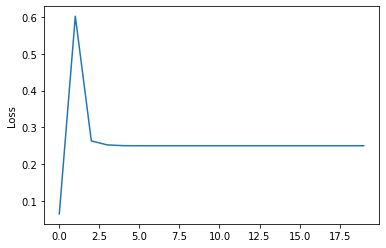

In [32]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [33]:
# show weights and bias
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-0.0009,  0.0024],
        [-0.0157,  0.0447]])
linear.bias tensor([ 0.8533, -0.1062])
linear2.weight tensor([[ 0.4189, -0.0227]])
linear2.bias tensor([0.1401])


In [35]:
# test input
input = torch.tensor([1., 1.])
out = xor_network(input)
print(out)

tensor([0.5000], grad_fn=<AddBackward0>)
